# GIS introduction<br/><small>vector data</small>

## goals of the lecture
- the vector data and ESRI Shapefile
- the geodataframe in geopandas
- spatial projection

**based on the open data of:**

- [ISTAT](https://www.istat.it/it/archivio/222527) Italian National Institute of Statistic
- [Natural Earth Data](https://www.naturalearthdata.com)

### requirements

- python knowledge
- pandas

### status

*"The Earth isn't flat!!!"*


---

# setup

In [ ]:
pip install -r https://napo.github.io/geospatial_unitn_2024/requirements.txt

## import modules

In [1]:
import geopandas as gpd
import zipfile, io
import pandas as pd
import urllib
import os
from matplotlib import pyplot as plt  #to avoid the warning message by plotting the geometries
import warnings
warnings.simplefilter("ignore") #to avoid warning message

## install geopandas



# Let's start with GeoPandas

## Importing geospatial data

geopandas supports all the vector format offered by the [pyogrio project](https://github.com/geopandas/pyogrio)


we will play with the geospatial data offered by [ISTAT](https://istat.it)

### administrative units
[https://www.istat.it/notizia/confini-delle-unita-amministrative-a-fini-statistici-al-1-gennaio-2018-2/]

Here the zip file with all the different administrative levels of Italy


[https://www.istat.it/storage/cartografia/confini_amministrativi/generalizzati/2024/Limiti01012024_g.zip](https://www.istat.it/storage/cartografia/confini_amministrativi/generalizzati/2024/Limiti01012024_g.zip)

Download and investigate the data

In [2]:
if not os.path.exists('Limiti01012024_g'):
    # download the data
    zip_file_url = 'https://www.istat.it/storage/cartografia/confini_amministrativi/generalizzati/2024/Limiti01012024_g.zip'
    zip_file_name = "Limiti01012024_g.zip"
    urllib.request.urlretrieve(zip_file_url ,zip_file_name)
    z = zipfile.ZipFile(zip_file_name)
    # unzip the file
    z.extractall()


Directory listening

In [ ]:
os.listdir(".")

['01_gis_introduction_and_vector_data.ipynb',
 '02_exercise_lecture_gis_introduction.ipynb',
 '03_spatial_relationships_and_operations.ipynb',
 '04_exercise_spatial_relationship_and_operations.ipynb',
 '05_retrieving_vector_data.ipynb',
 '06_basis_for_mobility_analysis.ipynb',
 '07_raster_data_analysis.ipynb',
 'Limiti01012024_g.zip',
 'Limiti01012024_g',
 'graphhopper_start.sh']

Change directory

In [4]:
os.listdir('Limiti01012024_g')

['Com01012024_g', 'ProvCM01012024_g', 'Reg01012024_g', 'RipGeo01012024_g']

Limiti01012024_g => main folder with all the administrative borders of Italy in 2024
- RipGeo01012024_g<br/>&nbsp;folder with the macro-regions of Italy
- Reg01012024_g<br/>&nbsp;folder with the regions of Italy
- ProvCM01012024_g<br/>&nbsp;folder with the provinces of Italy
- Com01012024_g<br/>&nbsp;folder with the municipalities of Italy

#### Inspect the the macro regions


In [5]:
#look to the data inside the macro regions
os.chdir('Limiti01012024_g')
os.chdir('RipGeo01012024_g')

In [6]:
#show only the files
for root, dirs, files in os.walk("."):
    for filename in files:
        print(filename)

RipGeo01012024_g_WGS84.cpg
RipGeo01012024_g_WGS84.dbf
RipGeo01012024_g_WGS84.prj
RipGeo01012024_g_WGS84.shp
RipGeo01012024_g_WGS84.shx


### ESRI Shapefile

this is a *ESRI Shapefile* (an old but common used format for the geospatial vector data)

The format is proprietary and some format specifications are public.
A "ESRI Shapefile" is a collection of different files with the same name and different extensions.

The public specifications are for the extensions:

| extension | meaning       | content of the file                                                  |
| --------- | ------------- | -------------------------------------------------------------------- |
| .shp      | shape         | the geometries (point, line, polygon)                                |
| .dbf      | database file | the attributes to associate with the geometries                      |
| .shx      | shape indices | the indices to join the geometries with the attributes               |
| .prj      | projection    | the rule to understand the kind of projection used by the geometries |

To manage the data are _necessary_ 3 files (*.shp, .shx, and .dbf*), however the *.prj* file is crucial to analyze the data togheter with other sources.

It's possibile find other kind of files

more informations are [here](https://www.esri.com/library/whitepapers/pdfs/shapefile.pdf
)



**read the file with gepandas**

In [7]:
# read the file
macroregions=gpd.read_file('RipGeo01012024_g_WGS84.shp')

In [8]:
type(macroregions)

geopandas.geodataframe.GeoDataFrame

### GeoDataframe

geopandas transform everything in a [GeoDataFrame](http://geopandas.org/data_structures.html#geodataframe).

a geodataframe is a pandas [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) with the column "geometry" and special geospatial methods

In [9]:
macroregions

COD_RIP     DEN_RIP    Shape_Leng    Shape_Area  \
0        1  Nord-ovest  2.330675e+06  5.793083e+10   
1        2    Nord-est  2.313109e+06  6.239611e+10   
2        3      Centro  2.013166e+06  5.803001e+10   
3        4         Sud  2.535023e+06  7.378181e+10   
4        5       Isole  2.793918e+06  4.993062e+10   

                                            geometry  
0  MULTIPOLYGON (((568227.844 4874810.869, 568220...  
1  MULTIPOLYGON (((618343.929 4893985.660, 618335...  
2  MULTIPOLYGON (((876021.906 4524682.296, 875656...  
3  MULTIPOLYGON (((1083358.846 4416348.740, 10833...  
4  MULTIPOLYGON (((822901.365 3935306.722, 822879...

Eg.
calculate the area of each geometry

In [10]:
macroregions.geometry.length

0    2.330675e+06
1    2.313109e+06
2    2.013166e+06
3    2.535023e+06
4    2.793918e+06
dtype: float64

**you can plot it**

<Axes: >

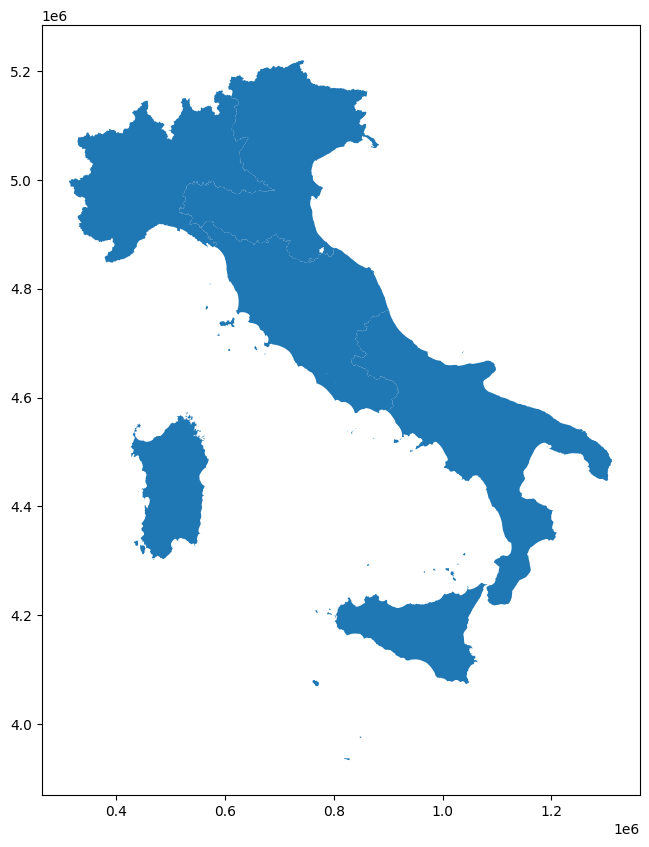

In [11]:
macroregions.plot(figsize=(10,10))

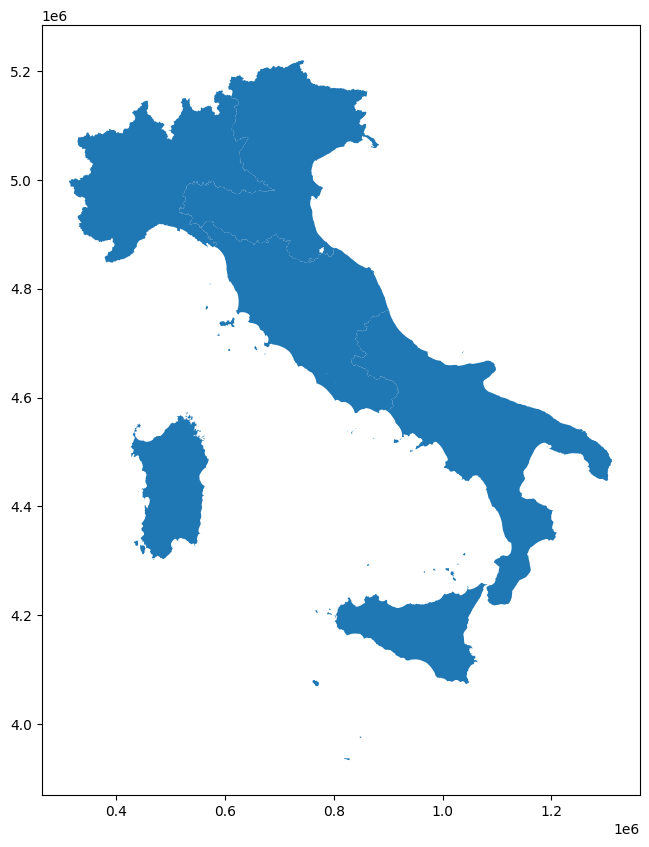

In [12]:
macroregions.plot(figsize=(10,10))
plt.show()

... and new we can use the **classic methods of the pandas DataFrame.**

Eg.

extract a (geo)DataFrame by filter from an attribute

In [13]:
macroregions['DEN_RIP']

0    Nord-ovest
1      Nord-est
2        Centro
3           Sud
4         Isole
Name: DEN_RIP, dtype: object

In [14]:
macroregions.DEN_RIP.unique()

array(['Nord-ovest', 'Nord-est', 'Centro', 'Sud', 'Isole'], dtype=object)

In [15]:
islands = macroregions[macroregions['DEN_RIP'] == 'Isole']

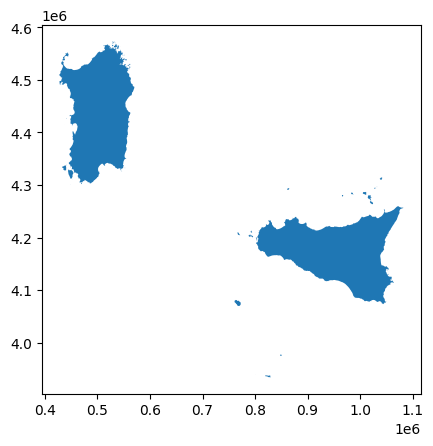

In [16]:
islands.plot()
plt.show()

In [17]:
macroregions.geom_type

0    MultiPolygon
1    MultiPolygon
2    MultiPolygon
3    MultiPolygon
4    MultiPolygon
dtype: object

in an *ESRI shapefile* the kind of geometry *is always the same*, but a *geodataframe* can accept *mixed geometries* for each row.

in our case we have a MultiPolygon
the geometries allowed are:

|geometry|images|
|:--|--:|
|POINT|![](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c2/SFA_Point.svg/51px-SFA_Point.svg.png)|
|LINESTRING|![](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/SFA_LineString.svg/51px-SFA_LineString.svg.png)|
|LINEARRING|![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/docs/assets/images/linering.png)|
|POLYGON|![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/SFA_Polygon.svg/51px-SFA_Polygon.svg.png)![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/SFA_Polygon_with_hole.svg/51px-SFA_Polygon_with_hole.svg.png)
|MULTIPOINT|![](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d6/SFA_MultiPoint.svg/51px-SFA_MultiPoint.svg.png)
| MULITLINESTRING|![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/86/SFA_MultiLineString.svg/51px-SFA_MultiLineString.svg.png)|
| MULTIPOLYGON |![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3b/SFA_MultiPolygon_with_hole.svg/51px-SFA_MultiPolygon_with_hole.svg.png)|
| GEOMETRYCOLLECTION |![](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1d/SFA_GeometryCollection.svg/51px-SFA_GeometryCollection.svg.png) |

note: table based on the wikipedia page [WKT](https://en.wikipedia.org/wiki/Well-known_text_representation_of_geometry)

#### now we are ready to look how are the geometries

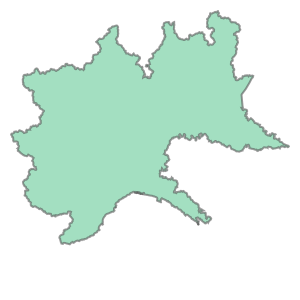

In [28]:
macroregions.geometry[0]

In [29]:
macroregions.DEN_RIP[0]


'Nord-ovest'

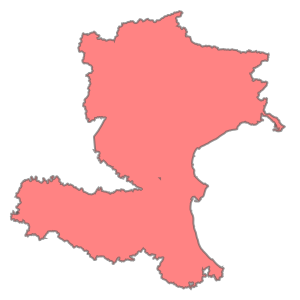

In [30]:
macroregions.geometry[1]

In [31]:
macroregions.DEN_RIP[1]


'Nord-est'

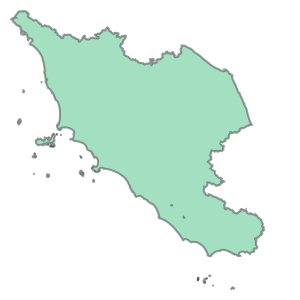

In [32]:
macroregions.geometry[2]

In [33]:
macroregions.DEN_RIP[2]


'Centro'

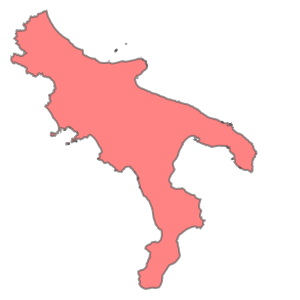

In [34]:
macroregions.geometry[3]

In [35]:
macroregions.DEN_RIP[3]


'Sud'

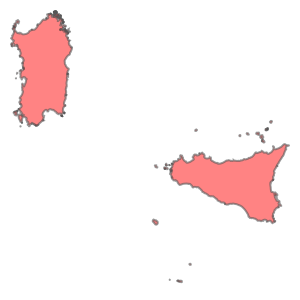

In [36]:
macroregions.geometry[4]

In [37]:
macroregions.DEN_RIP[4]


'Isole'

**the red color, in this case, means a mistake on the geometries!!!**
##### ... and we can check it!

In [38]:
macroregions.geometry.is_valid

0     True
1    False
2     True
3    False
4    False
dtype: bool

In [43]:
macroregions.geometry.make_valid()

0    MULTIPOLYGON (((568227.844 4874810.869, 568220...
1    MULTIPOLYGON (((618304.929 4894004.660, 618304...
2    MULTIPOLYGON (((876021.906 4524682.296, 875656...
3    MULTIPOLYGON (((1037304.532 4449458.489, 10373...
4    MULTIPOLYGON (((449019.484 4301567.252, 449018...
dtype: geometry

In [44]:
macroregions.geometry.make_valid().is_valid

0    True
1    True
2    True
3    True
4    True
dtype: bool

In [45]:
macroregions.geometry = macroregions.geometry.make_valid()

#### Do you want know the centroid position of each geometry?

In [46]:
macroregions.geometry.centroid

0     POINT (478141.127 5011450.004)
1     POINT (702047.578 5039726.131)
2     POINT (756697.586 4757567.082)
3    POINT (1061529.175 4529738.599)
4     POINT (736449.924 4300341.484)
dtype: geometry

the output of the geometries is in [well knowtext format (WKT)](https://en.wikipedia.org/wiki/Well-known_text_representation_of_geometry)

but ... how are expressed the coordinates??
we have to know the Coordinate Reference System (CRS)

# SPATIAL PROJECTIONS

**CRS** = *Coordinate Reference System*

## The Earth isn't FLAT
### The true size
![](https://raw.githubusercontent.com/napo/geospatial_unitn_2024/refs/heads/main/docs/images/truesize.gif)

https://thetruesize.com/

## How to convert in latitude/longitude?

In [47]:
macroregions.crs

<Projected CRS: EPSG:32632>
Name: WGS 84 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 6°E and 12°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Austria. Cameroon. Denmark. Equatorial Guinea. France. Gabon. Germany. Italy. Libya. Liechtenstein. Monaco. Netherlands. Niger. Nigeria. Norway. Sao Tome and Principe. Svalbard. Sweden. Switzerland. Tunisia. Vatican City State.
- bounds: (6.0, 0.0, 12.0, 84.0)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## EPSG?
European Petroleum Survey Group  (1986-2005)<br/>
[IOGP](https://www.iogp.org/about-us/) - International Association of Oil & Gas Producers (2005-now)

An important project is the [EPSG registry](http://www.epsg-registry.org/) - the dataset of geodetic parameters

[http://epsg.io/32632](http://epsg.io/32632)

![](https://github.com/napo/geospatial_course_unitn/raw/master/docs/assets/images/epsg32632.png)

![](https://upload.wikimedia.org/wikipedia/commons/b/b9/Usgs_map_traverse_mercator.PNG)

![](https://upload.wikimedia.org/wikipedia/commons/e/ed/Utm-zones.jpg)

In [48]:
macroregions.geometry.centroid.to_crs(epsg=4326)

0     POINT (8.72141 45.25621)
1    POINT (11.58533 45.48180)
2    POINT (12.14553 42.92751)
3    POINT (15.64720 40.72684)
4    POINT (11.72352 38.82014)
dtype: geometry

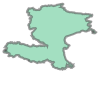

In [49]:
macroregions.to_crs(epsg=4326).geometry[1]

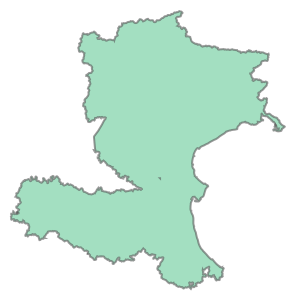

In [50]:
macroregions.geometry[1]

### WGS84 VS ETRS89

|  [WGS84](https://epsg.io/4326)  |  [ETRS89](https://epsg.io/4258) |
|---|---|
|  ![](https://github.com/napo/geospatial_course_unitn/blob/master/images/wgs84_coverage.png?raw=true) | ![](https://github.com/napo/geospatial_course_unitn/blob/master/images/etrs89_coverage.png?raw=true)  

## exploring a .prj file

In [51]:
f=open('RipGeo01012024_g_WGS84.prj','r')

In [52]:
f.read()

'PROJCS["WGS_1984_UTM_Zone_32N",GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137.0,298.257223563]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["False_Easting",500000.0],PARAMETER["False_Northing",0.0],PARAMETER["Central_Meridian",9.0],PARAMETER["Scale_Factor",0.9996],PARAMETER["Latitude_Of_Origin",0.0],UNIT["Meter",1.0]]'

... like here

[http://epsg.io/32632.wkt](http://epsg.io/32632.wkt)



## save the geodataframe


In [53]:
macroregions.to_crs(epsg=4326).to_file('macro_regions.geojson',driver='GeoJSON')

In [54]:
macroregions["lon"] = macroregions.geometry.to_crs(epsg=4326).centroid.x

In [55]:
macroregions["lat"] = macroregions.geometry.to_crs(epsg=4326).centroid.y

In [56]:
macroregions

COD_RIP     DEN_RIP    Shape_Leng    Shape_Area  \
0        1  Nord-ovest  2.330675e+06  5.793083e+10   
1        2    Nord-est  2.313109e+06  6.239611e+10   
2        3      Centro  2.013166e+06  5.803001e+10   
3        4         Sud  2.535023e+06  7.378181e+10   
4        5       Isole  2.793918e+06  4.993062e+10   

                                            geometry        lon        lat  
0  MULTIPOLYGON (((568227.844 4874810.869, 568220...   8.729832  45.257587  
1  MULTIPOLYGON (((618304.929 4894004.660, 618304...  11.593322  45.490274  
2  MULTIPOLYGON (((876021.906 4524682.296, 875656...  12.131326  42.932921  
3  MULTIPOLYGON (((1037304.532 4449458.489, 10373...  15.619908  40.740742  
4  MULTIPOLYGON (((449019.484 4301567.252, 449018...  11.625726  38.820231


<b>OUTPUT FORMATS</b>: <br>

the library *fiona* offers different kind of output formats



In [57]:
from pyogrio import list_drivers
list_drivers()

{'PCIDSK': 'rw',
 'PDS4': 'rw',
 'VICAR': 'rw',
 'PDF': 'rw',
 'MBTiles': 'rw',
 'EEDA': 'r',
 'OGCAPI': 'r',
 'ESRI Shapefile': 'rw',
 'MapInfo File': 'rw',
 'UK .NTF': 'r',
 'LVBAG': 'r',
 'OGR_SDTS': 'r',
 'S57': 'rw',
 'DGN': 'rw',
 'OGR_VRT': 'r',
 'Memory': 'rw',
 'CSV': 'rw',
 'GML': 'rw',
 'GPX': 'rw',
 'KML': 'rw',
 'GeoJSON': 'rw',
 'GeoJSONSeq': 'rw',
 'ESRIJSON': 'r',
 'TopoJSON': 'r',
 'OGR_GMT': 'rw',
 'GPKG': 'rw',
 'SQLite': 'rw',
 'WAsP': 'rw',
 'OpenFileGDB': 'rw',
 'DXF': 'rw',
 'FlatGeobuf': 'rw',
 'Geoconcept': 'rw',
 'GeoRSS': 'rw',
 'VFK': 'r',
 'PGDUMP': 'rw',
 'OSM': 'r',
 'GPSBabel': 'rw',
 'OGR_PDS': 'r',
 'WFS': 'r',
 'OAPIF': 'r',
 'EDIGEO': 'r',
 'SVG': 'r',
 'Idrisi': 'r',
 'ODS': 'rw',
 'XLSX': 'rw',
 'Elasticsearch': 'rw',
 'Carto': 'rw',
 'AmigoCloud': 'rw',
 'SXF': 'r',
 'Selafin': 'rw',
 'JML': 'rw',
 'PLSCENES': 'r',
 'CSW': 'r',
 'VDV': 'rw',
 'MVT': 'rw',
 'NGW': 'rw',
 'MapML': 'rw',
 'GTFS': 'r',
 'PMTiles': 'rw',
 'JSONFG': 'rw',
 'MiraMonVecto

## download file from colab

![](https://raw.githubusercontent.com/napo/geospatial_unitn_2024/refs/heads/main/images/download_file_colab.jpg)


... otherwise you can simply load the file from your filesystem where you hosted this script :)


and visualize on [https://geojson.io](https://geojson.io)

![](https://raw.githubusercontent.com/napo/geospatial_unitn_2024/refs/heads/main/images/geojsonio.jpg)

# Other Examples

## Explore Natural Earth Data
<img src="https://www.naturalearthdata.com/wp-content/uploads/2009/08/NEV-Logo-Black.png" width="450px"/>

[https://www.naturalearthdata.com/](https://www.naturalearthdata.com/)


Check the nice dataset about disputed areas

![](https://raw.githubusercontent.com/napo/geospatial_unitn_2024/refs/heads/main/images/disputed_areas.png)

Start from this [document](https://www.naturalearthdata.com/about/disputed-boundaries-policy/)

Investigate the data

In [58]:
url_naturalearth_data_disputed_areas = "https://naciscdn.org/naturalearth/10m/cultural/ne_10m_admin_0_disputed_areas.zip"


In [59]:
disputed_areas = gpd.read_file(url_naturalearth_data_disputed_areas)

In [60]:
disputed_areas.head(3)

featurecla  scalerank  LABELRANK SOVEREIGNT SOV_A3  \
0              Admin-0 claim area          0          5      India    IND   
1              Admin-0 claim area          0          5      China    CH1   
2  Admin-0 breakaway and disputed          0          4     Israel    IS1   

   ADM0_DIF  LEVEL      TYPE   TLC   ADMIN  ...     FCLASS_TR     FCLASS_ID  \
0         0      5  Disputed  None   India  ...  Unrecognized          None   
1         1      5  Disputed  None   China  ...  Unrecognized          None   
2         1      5  Disputed  None  Israel  ...  Unrecognized  Unrecognized   

      FCLASS_PL     FCLASS_GR     FCLASS_IT     FCLASS_NL     FCLASS_SE  \
0          None          None          None          None          None   
1          None          None          None          None          None   
2  Unrecognized  Unrecognized  Unrecognized  Unrecognized  Unrecognized   

      FCLASS_BD     FCLASS_UA  \
0          None          None   
1          None          None   
2  Unrecognized  Unrecognized   

                                            geometry  
0  POLYGON ((77.80035 35.49541, 77.81533 35.47334...  
1  POLYGON ((77.80035 35.49541, 77.82949 35.49179...  
2  POLYGON ((34.24835 31.21145, 34.26440 31.22419...  

[3 rows x 169 columns]

In [61]:
list(disputed_areas.columns)

['featurecla',
 'scalerank',
 'LABELRANK',
 'SOVEREIGNT',
 'SOV_A3',
 'ADM0_DIF',
 'LEVEL',
 'TYPE',
 'TLC',
 'ADMIN',
 'ADM0_A3',
 'GEOU_DIF',
 'GEOUNIT',
 'GU_A3',
 'SU_DIF',
 'SUBUNIT',
 'SU_A3',
 'BRK_DIFF',
 'NAME',
 'NAME_LONG',
 'BRK_A3',
 'BRK_NAME',
 'BRK_GROUP',
 'ABBREV',
 'POSTAL',
 'FORMAL_EN',
 'FORMAL_FR',
 'NAME_CIAWF',
 'NOTE_ADM0',
 'NOTE_BRK',
 'NAME_SORT',
 'NAME_ALT',
 'MAPCOLOR7',
 'MAPCOLOR8',
 'MAPCOLOR9',
 'MAPCOLOR13',
 'POP_EST',
 'POP_RANK',
 'POP_YEAR',
 'GDP_MD',
 'GDP_YEAR',
 'ECONOMY',
 'INCOME_GRP',
 'FIPS_10',
 'ISO_A2',
 'ISO_A2_EH',
 'ISO_A3',
 'ISO_A3_EH',
 'ISO_N3',
 'ISO_N3_EH',
 'UN_A3',
 'WB_A2',
 'WB_A3',
 'WOE_ID',
 'WOE_ID_EH',
 'WOE_NOTE',
 'ADM0_ISO',
 'ADM0_DIFF',
 'ADM0_TLC',
 'ADM0_A3_US',
 'ADM0_A3_FR',
 'ADM0_A3_RU',
 'ADM0_A3_ES',
 'ADM0_A3_CN',
 'ADM0_A3_TW',
 'ADM0_A3_IN',
 'ADM0_A3_NP',
 'ADM0_A3_PK',
 'ADM0_A3_DE',
 'ADM0_A3_GB',
 'ADM0_A3_BR',
 'ADM0_A3_IL',
 'ADM0_A3_PS',
 'ADM0_A3_SA',
 'ADM0_A3_EG',
 'ADM0_A3_MA',
 'ADM0_A3_PT

In [62]:
admins = disputed_areas.ADMIN.value_counts()
admins = admins.sort_values(ascending=False)
admins

ADMIN
India                                   8
Spain                                   7
Israel                                  7
French Southern and Antarctic Lands     5
South Korea                             3
China                                   3
Croatia                                 3
Georgia                                 2
Pakistan                                2
Egypt                                   2
British Indian Ocean Territory          2
Guyana                                  2
Belize                                  2
South Georgia and the Islands           2
Palestine                               2
France                                  2
Russia                                  2
Ukraine                                 2
United States Minor Outlying Islands    2
Bhutan                                  2
Somaliland                              1
North Korea                             1
Morocco                                 1
Western Sahara              

plot it

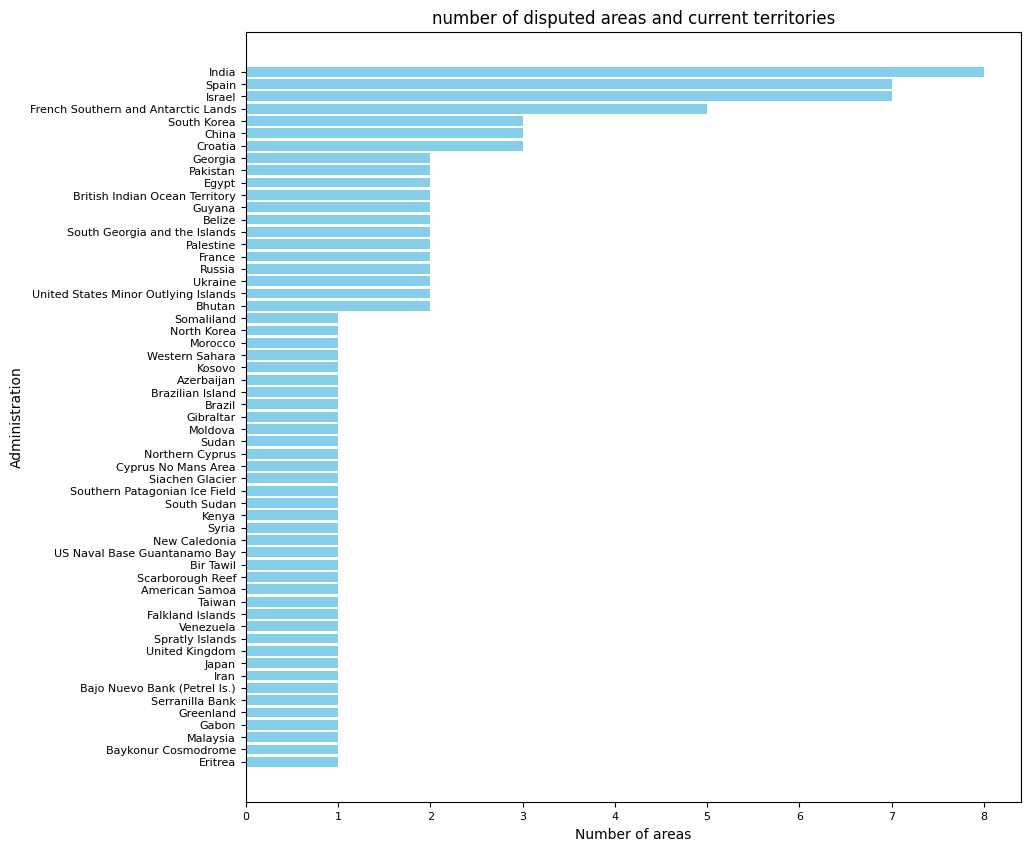

In [63]:
plt.figure(figsize=(10, 10))
plt.barh(admins.index, admins.values, color='skyblue')
plt.xlabel('Number of areas')
plt.ylabel('Administration')
plt.title('number of disputed areas and current territories')
plt.gca().invert_yaxis()
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

In [65]:
disputed_areas.explore(tooltip="NAME")

In [66]:
url_naturalearth_data_disputed_bordes = "https://naciscdn.org/naturalearth/10m/cultural/ne_10m_admin_0_boundary_lines_disputed_areas.zip"
disputed_borders = gpd.read_file(url_naturalearth_data_disputed_bordes)

In [67]:
disputed_borders.head(3)

FEATURECLA                        NAME  \
0  Claim boundary              Japanese claim   
1  Reference line  Former USSR oblast in 1991   
2  Reference line  Former USSR oblast in 1991   

                                          COMMENT  ADM0_USA ADM0_LEFT  \
0                                            None       1.0    Russia   
1  Nagorno-Karabakh Autonomous Oblast, circa 1991      -1.0      None   
2  Nagorno-Karabakh Autonomous Oblast, circa 1991      -1.0      None   

  ADM0_RIGHT ADM0_A3_L ADM0_A3_R SOV_A3_L SOV_A3_R  ...     FCLASS_IT  \
0     Russia       RUS       RUS      RUS      RUS  ...          None   
1       None       AZE       AZE      AZE      AZE  ...  Unrecognized   
2       None       AZE       AZE      AZE      AZE  ...  Unrecognized   

      FCLASS_NL     FCLASS_SE     FCLASS_BD BRK_A3     FCLASS_UA       ne_id  \
0          None          None          None    B29          None  1746705361   
1  Unrecognized  Unrecognized  Unrecognized    B38  Unrecognized  1746705365   
2  Unrecognized  Unrecognized  Unrecognized    B38  Unrecognized  1746705369   

     FCLASS_OSM  FCLASS_TLC                                           geometry  
0  Unrecognized        None  LINESTRING (149.35934 45.18272, 149.30354 45.2...  
1  Unrecognized        None  LINESTRING (47.18210 39.85363, 47.19110 39.861...  
2  Unrecognized        None  LINESTRING (46.72881 40.41284, 46.73997 40.412...  

[3 rows x 56 columns]

In [68]:
longest = disputed_borders.to_crs(epsg=3857).geometry.length.max()
shortest = disputed_borders.to_crs(epsg=3857).geometry.length.min()

In [69]:
longest_border_disputed = disputed_borders[disputed_borders.to_crs(epsg=3857).geometry.length == longest]
longest_border_disputed

FEATURECLA          NAME COMMENT  ADM0_USA ADM0_LEFT ADM0_RIGHT  \
16  Claim boundary  Indian claim    None       1.0     China      China   

   ADM0_A3_L ADM0_A3_R SOV_A3_L SOV_A3_R  ...  FCLASS_IT  FCLASS_NL FCLASS_SE  \
16       CHN       CHN      CH1      CH1  ...       None       None      None   

   FCLASS_BD BRK_A3 FCLASS_UA       ne_id    FCLASS_OSM  FCLASS_TLC  \
16      None    B07      None  1746705439  Unrecognized        None   

                                             geometry  
16  LINESTRING (78.91769 33.38626, 78.91253 33.402...  

[1 rows x 56 columns]

In [70]:
shortest_border_disputed = disputed_borders[disputed_borders.to_crs(epsg=3857).geometry.length == shortest]
shortest_border_disputed

FEATURECLA  NAME COMMENT  ADM0_USA           ADM0_LEFT ADM0_RIGHT  \
59  Claim boundary  None    None       1.0  Republic of Serbia    Croatia   

   ADM0_A3_L ADM0_A3_R SOV_A3_L SOV_A3_R  ...  FCLASS_IT  FCLASS_NL FCLASS_SE  \
59       SRB       HRV      SRB      HRV  ...       None       None      None   

   FCLASS_BD BRK_A3 FCLASS_UA       ne_id                       FCLASS_OSM  \
59      None   None      None  1746705837  International boundary (verify)   

    FCLASS_TLC                                           geometry  
59        None  LINESTRING (19.00752 45.35953, 19.02851 45.350...  

[1 rows x 56 columns]

In [71]:
longest_border_disputed.explore(tooltip=['NAME', 'NOTE','ADM0_LEFT','ADM0_RIGHT'])

In [72]:
shortest_border_disputed.explore(tooltip=['NAME', 'NOTE','ADM0_LEFT','ADM0_RIGHT'])


---

## Exercise

1. load the shapefile of ISTAT with the information of the provinces
  - filter it for the province on Verona
  - plot it
2. load the shapefile of ISTAT with the informations of the muncipalities
  - identify the cities of the province selected with the biggest and smallest area
  - extract all the centroids of the areas expressed in WGS84
  - extract a representative point for the area of each municipality converted in WGS84
  - save the points in a GeoJSON file
  - calculate the distance on the geodentic between the municipality with the big area and smallest area by using the centroid
3. download the shapefile of the [Mountain Basins Station](https://raw.githubusercontent.com/napo/geospatial_unitn_2024/refs/heads/main/data/idrspacq.zip) of Trentino - projection ETRS89 UTM32N
  - plot the geometries where CODE is "0191" for the table "d_tipouso.dbf"
  - convert in WGS84 and create a KML and plot it on a website

In [37]:
os.chdir("Limiti01012024_g/ProvCM01012024_g")
provinces = gpd.read_file("ProvCM01012024_g_WGS84.shp")
#provinces.plot()

<Axes: >

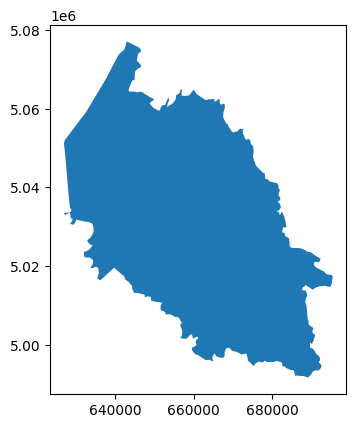

In [38]:
verona = provinces.loc[provinces.loc[:,"DEN_PROV"]=="Verona"]
verona.plot()

<Axes: >

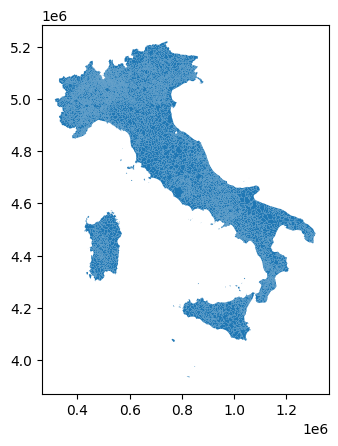

In [39]:
os.chdir("../Com01012024_g")
municipalities = gpd.read_file("Com01012024_g_WGS84.shp")
municipalities.plot()

In [40]:
verona_municipalities = municipalities.loc[municipalities.loc[:,"COD_PROV"]==verona.loc[:,"COD_PROV"].iloc[0],:]

In [58]:
verona_two_cities = municipalities.iloc[[verona_municipalities.area.idxmax(), verona_municipalities.area.idxmin()],:]
verona_two_cities

COD_RIP  COD_REG  COD_PROV  COD_CM  COD_UTS  PRO_COM PRO_COM_T  \
3191        2        5        23       1       23    23091    023091   
803         2        5        23       0       23    23029    023029   

           COMUNE COMUNE_A  CC_UTS    Shape_Leng    Shape_Area  \
3191       Verona        0       1  81590.503539  1.988637e+08   
803   Concamarise        0       0  14284.325419  7.937906e+06   

                                               geometry  
3191  POLYGON ((661804.634 5045222.182, 662018.496 5...  
803   POLYGON ((667884.598 5010314.753, 668599.536 5...

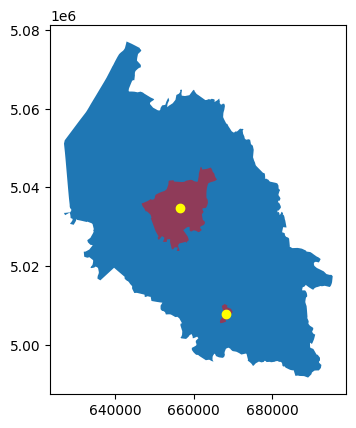

In [59]:
ax = verona.plot()
verona_two_cities.plot(ax=ax, color="red", alpha=0.5)
verona_two_cities.centroid.plot(ax=ax, color="yellow");

In [60]:
verona_two_cities.centroid.iloc[0].distance(verona_two_cities.centroid.iloc[1])/1000

29.265748784141035

In [61]:
verona_two_cities.loc[:,"geometry"] = verona_two_cities.centroid
verona_two_cities

COD_RIP  COD_REG  COD_PROV  COD_CM  COD_UTS  PRO_COM PRO_COM_T  \
3191        2        5        23       1       23    23091    023091   
803         2        5        23       0       23    23029    023029   

           COMUNE COMUNE_A  CC_UTS    Shape_Leng    Shape_Area  \
3191       Verona        0       1  81590.503539  1.988637e+08   
803   Concamarise        0       0  14284.325419  7.937906e+06   

                            geometry  
3191  POINT (656559.781 5034710.812)  
803   POINT (668218.348 5007867.528)

In [63]:
verona_two_cities.to_file("../two_cities_verona.geojson", driver="GeoJSON")

In [64]:
mountains = gpd.read_file("https://raw.githubusercontent.com/napo/geospatial_unitn_2024/refs/heads/main/data/idrspacq.zip")
mountains

CLASSID                     LIMITI  \
0        33                       None   
1       188                       None   
2       215                       None   
3       792                       None   
4      1196  Tutto lo specchio d'acqua   
..      ...                        ...   
428    1008  Dallo sbocco alle origini   
429    1009  Dallo sbocco alle origini   
430    1010  Dallo sbocco alle origini   
431    1014  Dallo sbocco alle origini   
432    1015  Dallo sbocco alle origini   

                                               ORIGPUB                  DENOM  \
0    Approvazione dell'elenco delle acque pubbliche...         SORGENTE REBUS   
1    Approvazione dell'elenco delle acque pubbliche...        SORGENTE AL FOL   
2    Approvazione dell'elenco delle acque pubbliche...    SORGENTE SUL CAMPIO   
3    Approvazione dell'elenco delle acque pubbliche...       SORGENTE STIMPFL   
4    Approvazione dell'elenco delle acque pubbliche...             LAGO LUNGO   
..                                                 ...                    ...   
428  Approvazione dell'elenco delle acque pubbliche...     RIO DI VALLE BORCA   
429  Approvazione dell'elenco delle acque pubbliche...  RIO DI VALLE MALGAZZA   
430  Approvazione dell'elenco delle acque pubbliche...       RIO DELLE MALGHE   
431  Approvazione dell'elenco delle acque pubbliche...   RIO DI VALLE BAIARDA   
432  Approvazione dell'elenco delle acque pubbliche...     RIO DI VALLE ROCCA   

                             FOCE                  COMUNI  \
0                       Rio Rebus                     Ala   
1                        Rio Sal  Trento (frazione Povo)   
2                Rio Val Battisti             Sant'Orsola   
3                     Rio Favogna         Magr all'Adige   
4    Rio del Baito di Val Venezia                    Peio   
..                            ...                     ...   
428            Rio di Val Binazza                    Livo   
429               Torrente Barnes                    Livo   
430               Torrente Barnes                    Livo   
431                    Fiume Noce    Caldes (San Giacomo)   
432                    Fiume Noce      Caldes (Samoclevo)   

                                              geometry  
0    POLYGON ((652049.051 5111656.028, 652048.685 5...  
1    POLYGON ((692800.350 5109936.688, 692800.452 5...  
2    POLYGON ((630281.891 5142817.705, 630280.968 5...  
3    POLYGON ((639594.539 5101816.668, 639595.021 5...  
4    POLYGON ((699476.146 5112122.038, 699476.461 5...  
..                                                 ...  
428  POLYGON ((699036.650 5115559.248, 699036.464 5...  
429  POLYGON ((652427.936 5150295.480, 652429.523 5...  
430  POLYGON ((643893.193 5120251.252, 643893.744 5...  
431  POLYGON ((714930.639 5151827.455, 714932.916 5...  
432  POLYGON ((720738.606 5127952.203, 720739.023 5...  

[433 rows x 7 columns]

In [71]:
mountains = mountains.set_crs("EPSG:4258")
mountains.crs

<Geographic 2D CRS: EPSG:4258>
Name: ETRS89
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Moldova; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain; Sweden; Switzerland; United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-16.1, 32.88, 40.18, 84.73)
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich